In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/venezia/venezia.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1985.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1996.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1993.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1992.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1986.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_2009.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1988.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_2013.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_2005.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_2001.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1990.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1984.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_2012.csv
/kaggle/input/venezia/Punta_Salute_1983_2015/Punta_Salute_1983.csv
/kaggle/input/venezia/Punta_

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from keras.models import Sequential
from keras.layers import LSTM, Dense, GRU, SimpleRNN,Dropout
from sklearn.preprocessing import MinMaxScaler ,  LabelEncoder, OneHotEncoder , StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data= pd.read_csv('/kaggle/input/venezia/venezia.csv',parse_dates=['datetime'])
data.shape

(289272, 2)

In [4]:
data.sample()

,datetime,level
277090,2014-08-11 11:00:00,75.0


In [5]:
data.head()

,datetime,level
0,1983-01-01 01:00:00,44.0
1,1983-01-01 02:00:00,35.0
2,1983-01-01 03:00:00,23.0
3,1983-01-01 04:00:00,10.0
4,1983-01-01 05:00:00,1.0


In [6]:
data['hour'] = data['datetime'].dt.hour
data['dayofweek'] = data['datetime'].dt.dayofweek
data['quarter'] = data['datetime'].dt.quarter
data['month'] = data['datetime'].dt.month
data['year'] = data['datetime'].dt.year
data['dayofyear'] = data['datetime'].dt.dayofyear
data['dayofmonth'] = data['datetime'].dt.day
data.head()

,datetime,level,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
0,1983-01-01 01:00:00,44.0,1,5,1,1,1983,1,1
1,1983-01-01 02:00:00,35.0,2,5,1,1,1983,1,1
2,1983-01-01 03:00:00,23.0,3,5,1,1,1983,1,1
3,1983-01-01 04:00:00,10.0,4,5,1,1,1983,1,1
4,1983-01-01 05:00:00,1.0,5,5,1,1,1983,1,1


In [7]:
data.tail()

,datetime,level,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
289267,2015-12-31 20:00:00,-18.0,20,3,4,12,2015,365,31
289268,2015-12-31 21:00:00,-14.0,21,3,4,12,2015,365,31
289269,2015-12-31 22:00:00,-5.0,22,3,4,12,2015,365,31
289270,2015-12-31 23:00:00,8.0,23,3,4,12,2015,365,31
289271,2016-01-01 00:00:00,20.0,0,4,1,1,2016,1,1


In [8]:
# data.drop(["datetime"],axis=1,inplace=True, errors="ignore")
# data = data.dropna()
# data

In [9]:
data.isna().sum()

datetime      0
level         0
hour          0
dayofweek     0
quarter       0
month         0
year          0
dayofyear     0
dayofmonth    0
dtype: int64

In [10]:
data.describe()

,datetime,level,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
count,289272,289272.000000,289272.000000,289272.000000,289272.000000,289272.000000,289272.00000,289272.000000,289272.000000
mean,1999-07-02 12:26:21.365634944,25.883449,11.500000,2.999900,2.508566,6.522947,1998.99945,183.118933,15.729144
min,1983-01-01 01:00:00,-92.000000,0.000000,0.000000,1.000000,1.000000,1983.00000,1.000000,1.000000
25%,1991-04-02 06:45:00,6.000000,5.750000,1.000000,2.000000,4.000000,1991.00000,92.000000,8.000000
50%,1999-07-02 11:30:00,27.000000,11.500000,3.000000,3.000000,7.000000,1999.00000,183.000000,16.000000
75%,2007-10-01 18:15:00,47.000000,17.250000,5.000000,4.000000,10.000000,2007.00000,274.000000,23.000000
max,2016-01-01 00:00:00,159.000000,23.000000,6.000000,4.000000,12.000000,2016.00000,366.000000,31.000000
std,NaN,29.130133,6.922199,2.000075,1.117075,3.448684,9.52173,105.436619,8.799995


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289272 entries, 0 to 289271
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   datetime    289272 non-null  datetime64[ns]
 1   level       289272 non-null  float64       
 2   hour        289272 non-null  int32         
 3   dayofweek   289272 non-null  int32         
 4   quarter     289272 non-null  int32         
 5   month       289272 non-null  int32         
 6   year        289272 non-null  int32         
 7   dayofyear   289272 non-null  int32         
 8   dayofmonth  289272 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(7)
memory usage: 12.1 MB


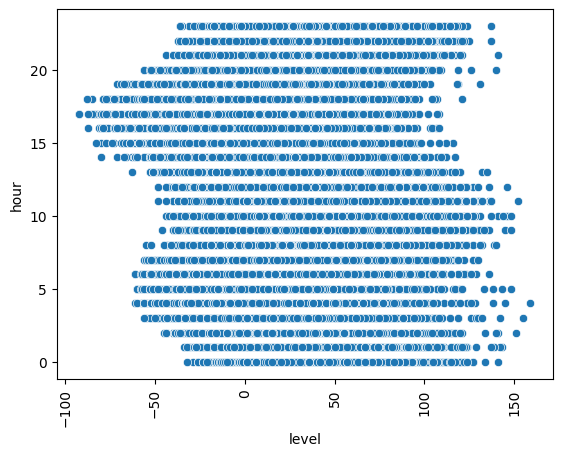

In [12]:
sns.scatterplot(data= data, x='level',y= 'hour')
plt.xticks(rotation=90)
plt.show()

In [13]:
data.tail()

,datetime,level,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
289267,2015-12-31 20:00:00,-18.0,20,3,4,12,2015,365,31
289268,2015-12-31 21:00:00,-14.0,21,3,4,12,2015,365,31
289269,2015-12-31 22:00:00,-5.0,22,3,4,12,2015,365,31
289270,2015-12-31 23:00:00,8.0,23,3,4,12,2015,365,31
289271,2016-01-01 00:00:00,20.0,0,4,1,1,2016,1,1


In [14]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
        n_vars = 1 if type(data) is list else data.shape[1]
        df = pd.DataFrame(data)
        cols, names = list(), list()
        # input sequence (t-n, ... t-1)
        for i in range(n_in, 0, -1):
            cols.append(df.shift(i))
            names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
        # forecast sequence (t, t+1, ... t+n)
        for i in range(0, n_out):
            cols.append(df.shift(-i))
            if i == 0:
                names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
            else:
                names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
        # put it all together
        agg = pd.concat(cols, axis=1)
        agg.columns = names
        # drop rows with NaN values
        #if dropnan:
            #agg.dropna(inplace=True)
        return agg

In [15]:
# Preprocess data
labelEncoder = LabelEncoder()
oneHotEncoder = OneHotEncoder(sparse=False)
ss = StandardScaler()

values = data.iloc[:,1:].values
# integer encode direction
#encoder = LabelEncoder()
#values[:,8] = encoder.fit_transform(values[:,8])
# ensure all data is float
values = values.astype('float32') 

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.shape

(289272, 16)

In [16]:
reframed.drop(reframed.iloc[:,8:],inplace= True,axis=1)
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.541833,0.043478,0.833333,0.0,0.0,0.000000,0.00000,0.0
2,0.505976,0.086957,0.833333,0.0,0.0,0.000000,0.00000,0.0
3,0.458167,0.130435,0.833333,0.0,0.0,0.000000,0.00000,0.0
4,0.406375,0.173913,0.833333,0.0,0.0,0.000000,0.00000,0.0
...,...,...,...,...,...,...,...,...
289267,0.290837,0.826087,0.500000,1.0,1.0,0.969696,0.99726,1.0
289268,0.294821,0.869565,0.500000,1.0,1.0,0.969696,0.99726,1.0
289269,0.310757,0.913043,0.500000,1.0,1.0,0.969696,0.99726,1.0
289270,0.346614,0.956522,0.500000,1.0,1.0,0.969696,0.99726,1.0


In [17]:
data.head()

,datetime,level,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
0,1983-01-01 01:00:00,44.0,1,5,1,1,1983,1,1
1,1983-01-01 02:00:00,35.0,2,5,1,1,1983,1,1
2,1983-01-01 03:00:00,23.0,3,5,1,1,1983,1,1
3,1983-01-01 04:00:00,10.0,4,5,1,1,1983,1,1
4,1983-01-01 05:00:00,1.0,5,5,1,1,1983,1,1


In [18]:
# split into train and test sets
reframed['year'] = data.year.astype('str')
split_date = '2014'

In [19]:
train = reframed.loc[reframed['year']<=split_date].drop(['year'],axis=1).dropna().values
test = reframed.loc[reframed['year']>split_date].drop(['year'],axis=1).dropna().values

# split into input and output
X_train, y_train = train[:, 0:-1], train[:, -1]
X_test, y_test = test[:, 0:-1], test[:, -1]

In [20]:
X_train.shape

(280510, 7)

In [21]:
y_train.shape

(280510,)

In [22]:
X_test.shape

(8761, 7)

In [23]:
y_test.shape

(8761,)

In [24]:

# Assuming X_train and X_test have shapes (batch_size, input_features)

# Reshape X_train and X_test to include the sequence_length dimension
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # Assuming sequence_length is 1
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)     # Assuming sequence_length is 1

# Now, X_train_reshaped and X_test_reshaped have shapes (batch_size, sequence_length, input_features)

# Define and compile your model
model = Sequential()
model.add(LSTM(100, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Fit the model with the reshaped data
history = model.fit(X_train_reshaped, y_train, epochs=15, batch_size=70, validation_data=(X_test_reshaped, y_test), verbose=2, shuffle=False)


Epoch 1/15
4008/4008 - 22s - loss: 0.2615 - val_loss: 0.2492 - 22s/epoch - 6ms/step
Epoch 2/15
4008/4008 - 13s - loss: 0.2495 - val_loss: 0.2294 - 13s/epoch - 3ms/step
Epoch 3/15
4008/4008 - 13s - loss: 0.2351 - val_loss: 0.2021 - 13s/epoch - 3ms/step
Epoch 4/15
4008/4008 - 13s - loss: 0.2108 - val_loss: 0.1951 - 13s/epoch - 3ms/step
Epoch 5/15
4008/4008 - 13s - loss: 0.1884 - val_loss: 0.1610 - 13s/epoch - 3ms/step
Epoch 6/15
4008/4008 - 13s - loss: 0.1803 - val_loss: 0.1863 - 13s/epoch - 3ms/step
Epoch 7/15
4008/4008 - 13s - loss: 0.1716 - val_loss: 0.1734 - 13s/epoch - 3ms/step
Epoch 8/15
4008/4008 - 13s - loss: 0.1495 - val_loss: 0.1492 - 13s/epoch - 3ms/step
Epoch 9/15
4008/4008 - 13s - loss: 0.1247 - val_loss: 0.1507 - 13s/epoch - 3ms/step
Epoch 10/15
4008/4008 - 13s - loss: 0.0983 - val_loss: 0.1222 - 13s/epoch - 3ms/step
Epoch 11/15
4008/4008 - 13s - loss: 0.0885 - val_loss: 0.1152 - 13s/epoch - 3ms/step
Epoch 12/15
4008/4008 - 13s - loss: 0.0819 - val_loss: 0.0875 - 13s/epoch 

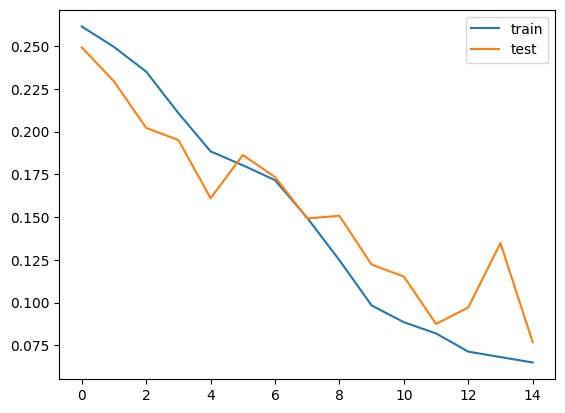

In [25]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [26]:
model.save("my_model.h5")